In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


---

**Part 1: Reading the data**
=

In [2]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


----

**Part 2: Checking and substituting null values**
=

In [3]:
#Check for null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
#Interpolate missing values in the BMI column
df['bmi']=df['bmi'].interpolate()

In [5]:
#Make sure there are no null values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

----

**Part 3A: Pie Charts**
=

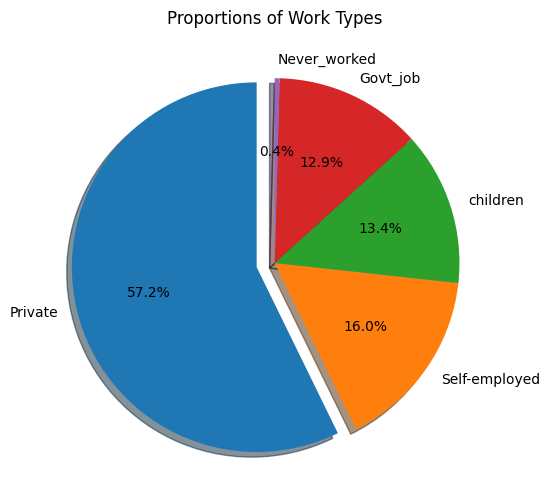

In [6]:
dfworktype=df['work_type']

count=dfworktype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Work Types')
plt.show()

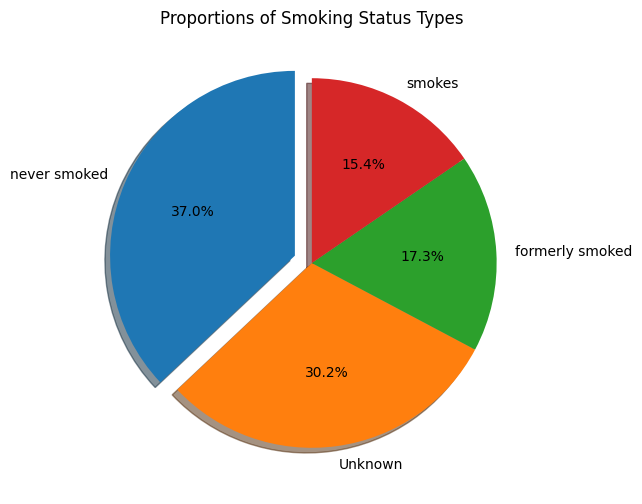

In [7]:
dfsmoketype=df['smoking_status']

count=dfsmoketype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Smoking Status Types')
plt.show()

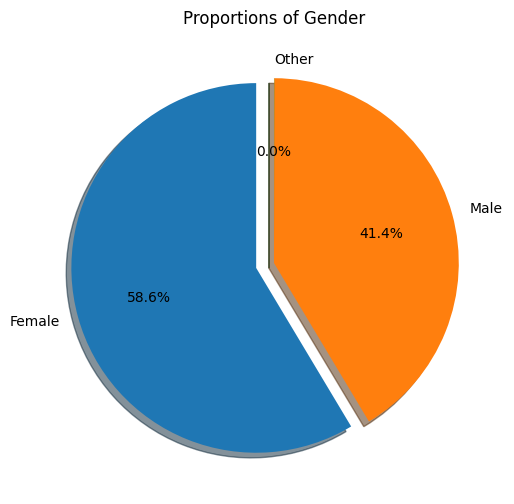

In [8]:
dfsmoketype=df['gender']

count=dfsmoketype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Gender')
plt.show()

----

**Part 3B: Countplots (Mostly Demographics)**
=

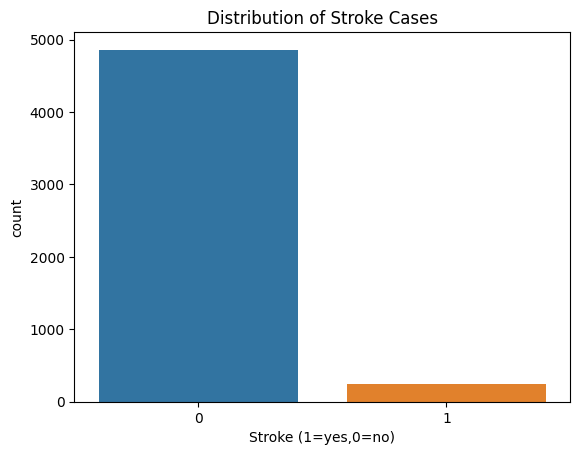

In [9]:
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (1=yes,0=no)')
plt.show()

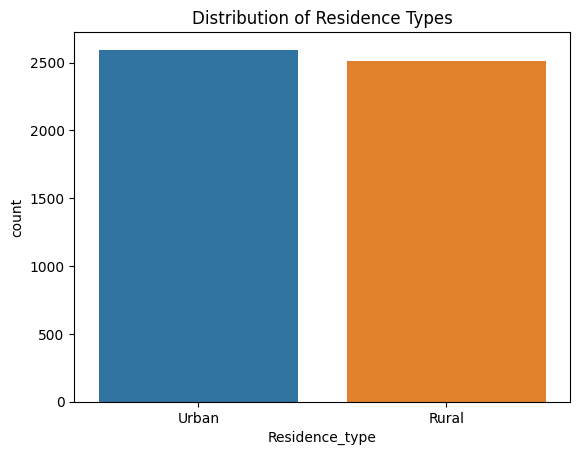

In [10]:
sns.countplot(x='Residence_type', data=df)
plt.title('Distribution of Residence Types')
plt.show()

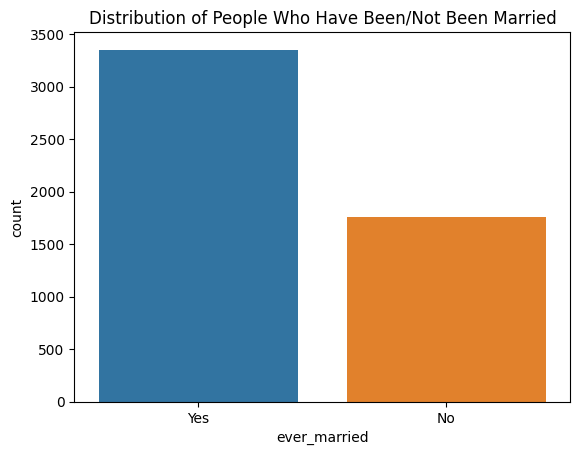

In [11]:
sns.countplot(x='ever_married', data=df)
plt.title('Distribution of People Who Have Been/Not Been Married')
plt.show()

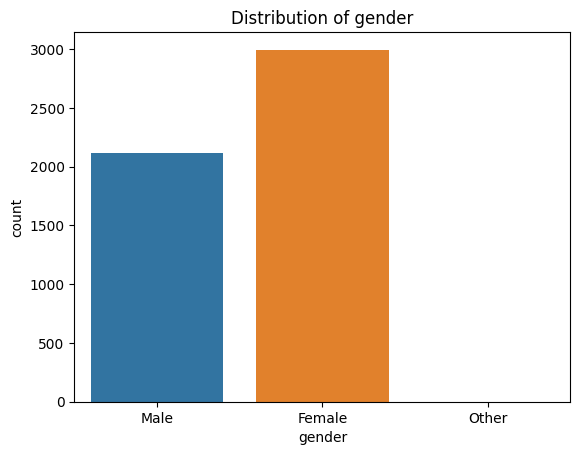

In [12]:
sns.countplot(x='gender', data=df)
plt.title('Distribution of gender')
plt.show()

----

**Part 3C: Heatmap**
=

<Axes: title={'center': 'Correlation Map'}>

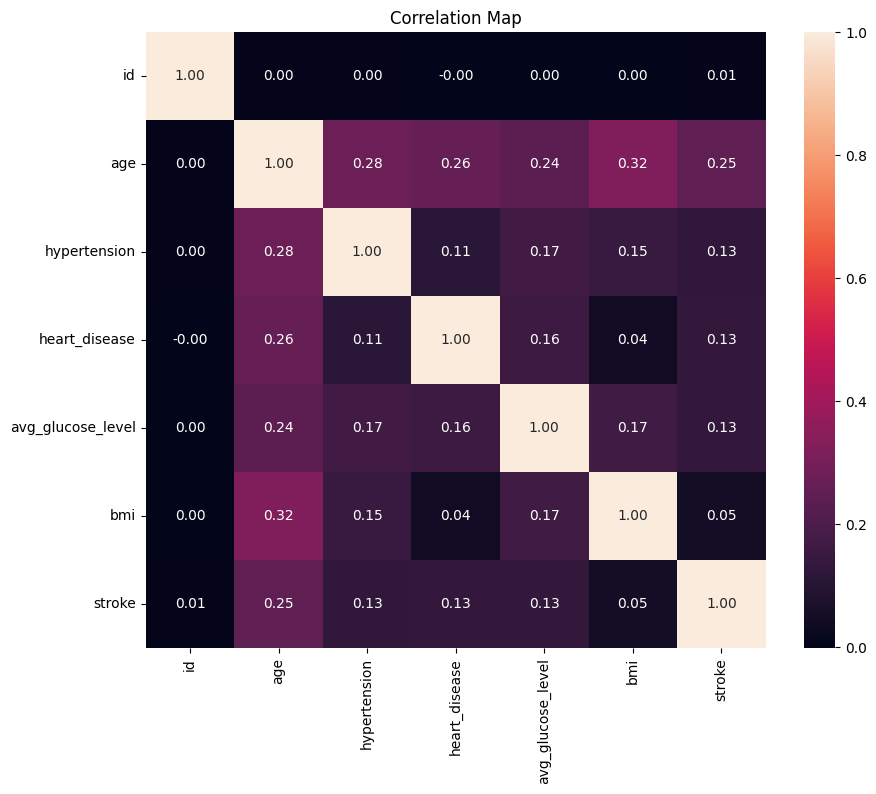

In [13]:
number = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(number.corr(),annot=True, fmt='.2f')

----

**Part 3D: Histoplots**
=

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


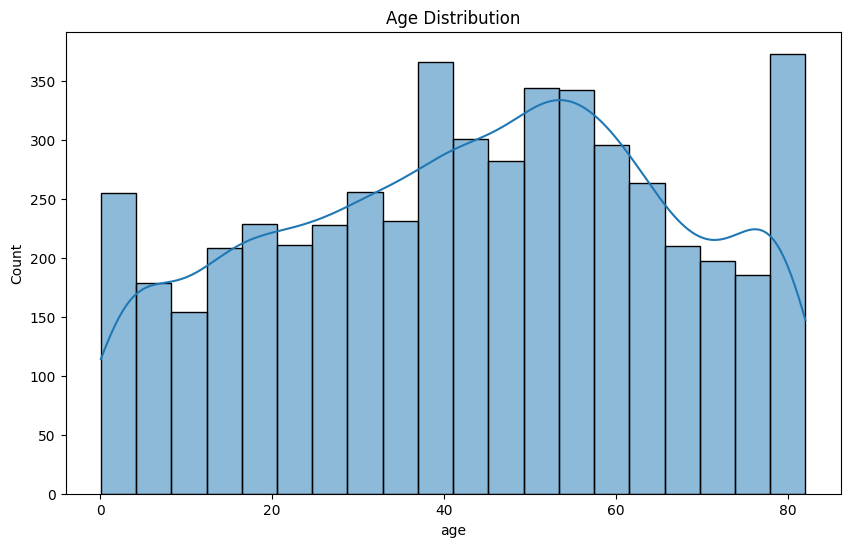

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", kde=True)
plt.title('Age Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


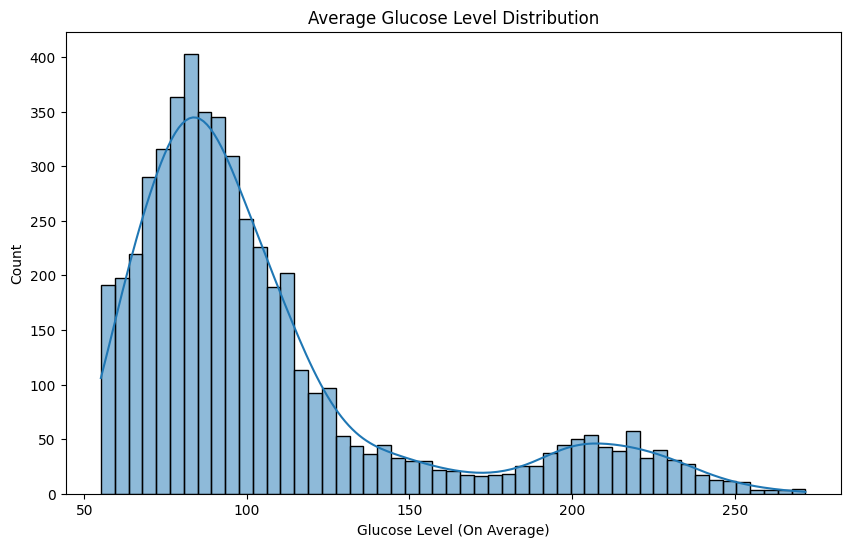

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="avg_glucose_level", kde=True)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Glucose Level (On Average)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


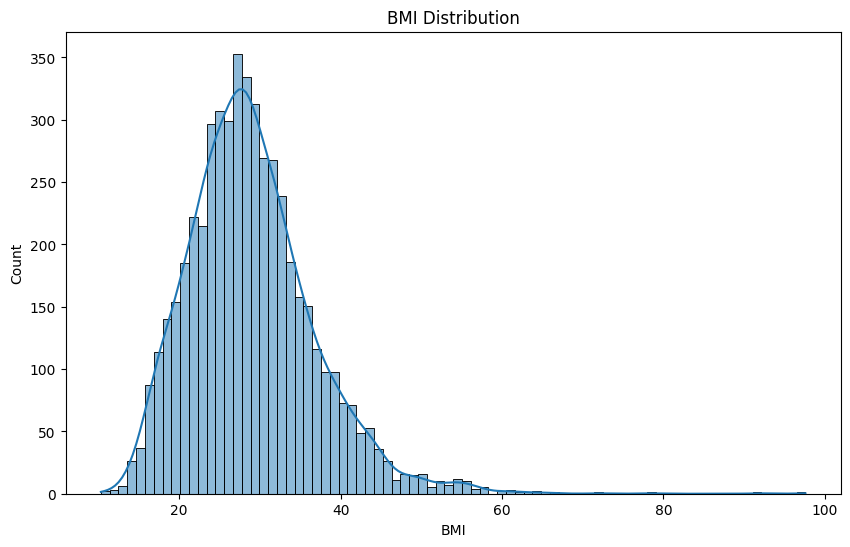

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="bmi", kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

----

**Part 3E: Countplots + Stacked + Hues**
=

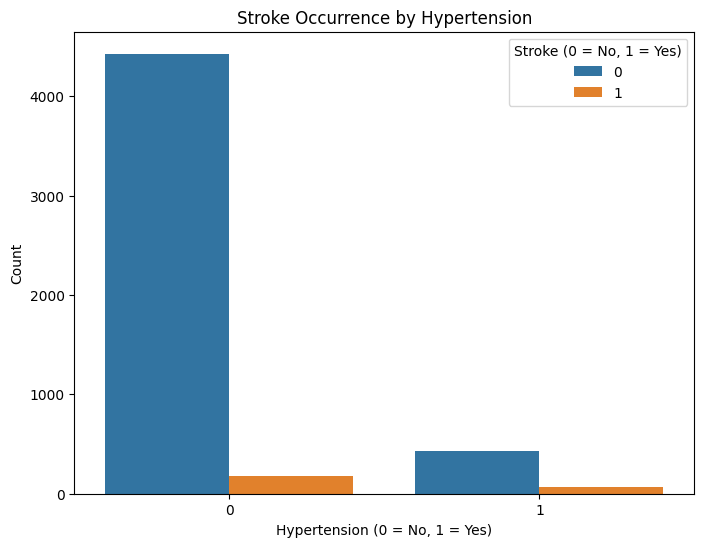

In [17]:
plt.figure(figsize=(8, 6))

sns.countplot(x='hypertension', hue='stroke', data=df)

plt.title('Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke (0 = No, 1 = Yes)')


plt.show()

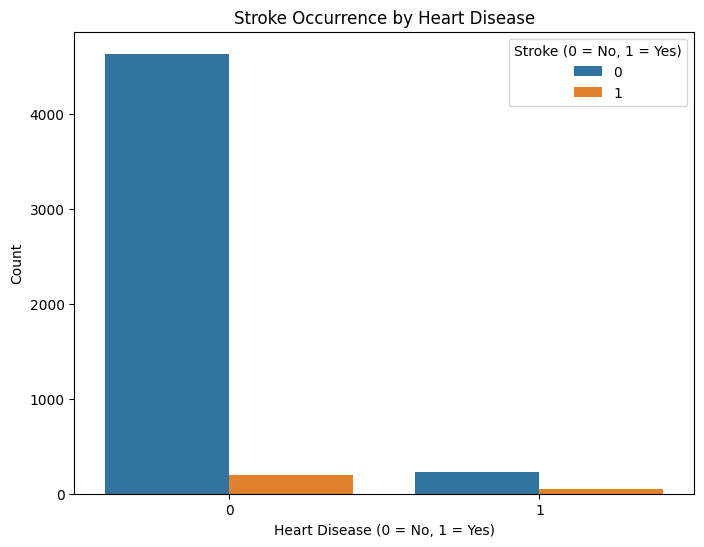

In [18]:
plt.figure(figsize=(8, 6))

sns.countplot(x='heart_disease', hue='stroke', data=df)

plt.title('Stroke Occurrence by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke (0 = No, 1 = Yes)')


plt.show()

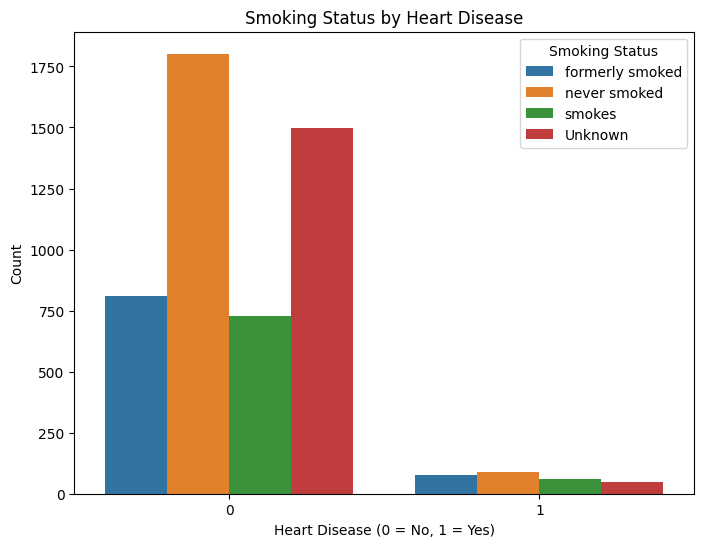

In [19]:
plt.figure(figsize=(8, 6))

sns.countplot(x='heart_disease', hue='smoking_status', data=df)

plt.title('Smoking Status by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Smoking Status')


plt.show()

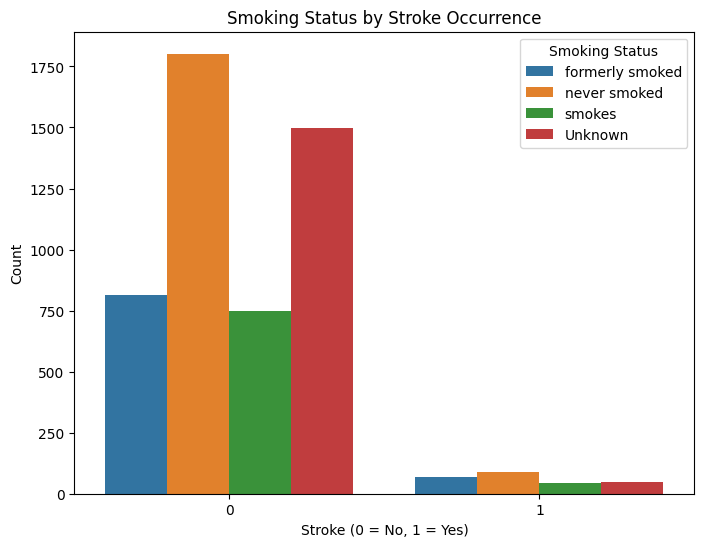

In [20]:
plt.figure(figsize=(8, 6))

sns.countplot(x='stroke', hue='smoking_status', data=df)

plt.title('Smoking Status by Stroke Occurrence')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Smoking Status')


plt.show()

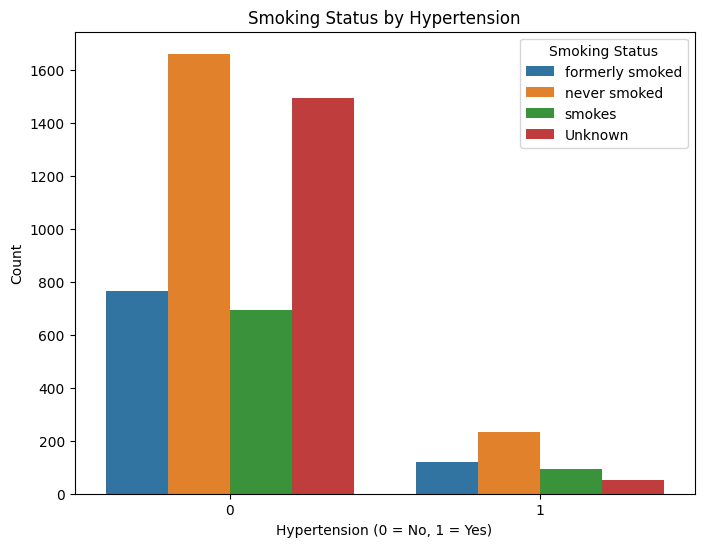

In [21]:
plt.figure(figsize=(8, 6))

sns.countplot(x='hypertension', hue='smoking_status', data=df)

plt.title('Smoking Status by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Smoking Status')


plt.show()

/tmp/ipykernel_17/663318025.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoking = df.groupby(['age_group', 'smoking_status']).size().unstack()


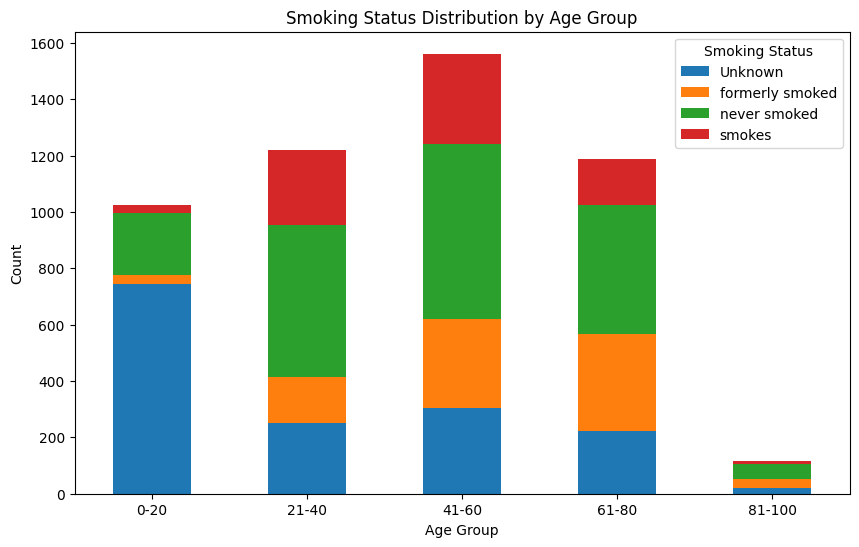

In [22]:
age_bins = [0, 20, 40, 60, 80, 100] 
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

age_smoking = df.groupby(['age_group', 'smoking_status']).size().unstack()

age_smoking.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Smoking Status Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.xticks(rotation=0)


plt.show()

/tmp/ipykernel_17/2398309392.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoking = df.groupby(['age_group2', 'work_type']).size().unstack()


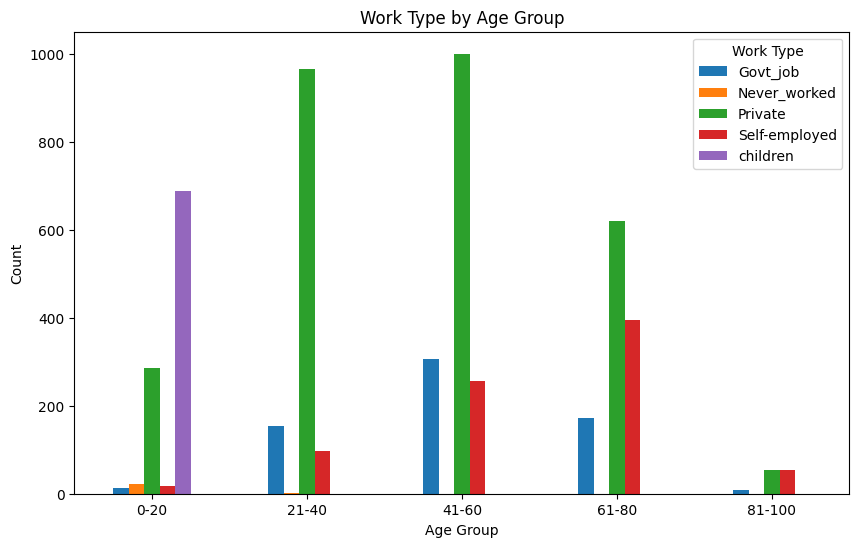

In [23]:
age_bins = [0, 20, 40, 60, 80, 100] 
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group2'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

age_smoking = df.groupby(['age_group2', 'work_type']).size().unstack()

age_smoking.plot(kind='bar',figsize=(10, 6))

plt.title('Work Type by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Work Type')
plt.xticks(rotation=0)


plt.show()

/tmp/ipykernel_17/629517746.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoking = df.groupby(['age_group3', 'Residence_type']).size().unstack()


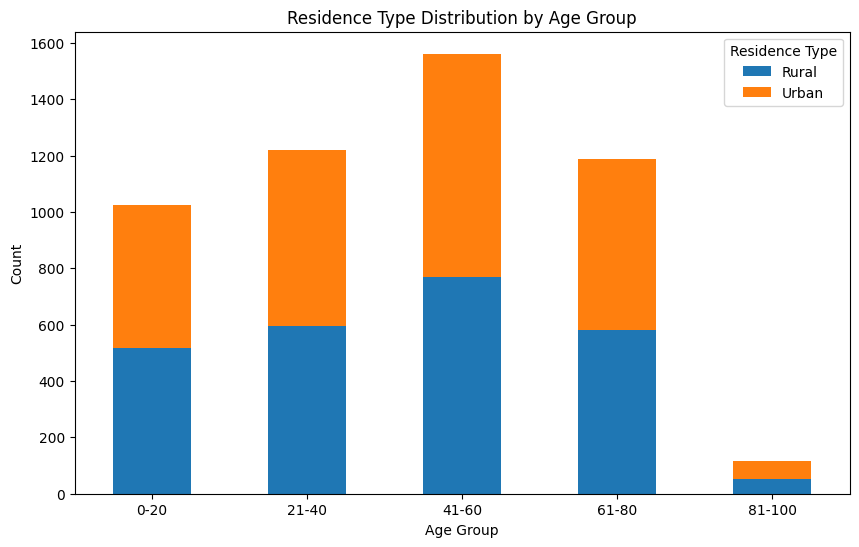

In [24]:
age_bins = [0, 20, 40, 60, 80, 100] 
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group3'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

age_smoking = df.groupby(['age_group3', 'Residence_type']).size().unstack()

age_smoking.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Residence Type Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Residence Type')
plt.xticks(rotation=0)


plt.show()

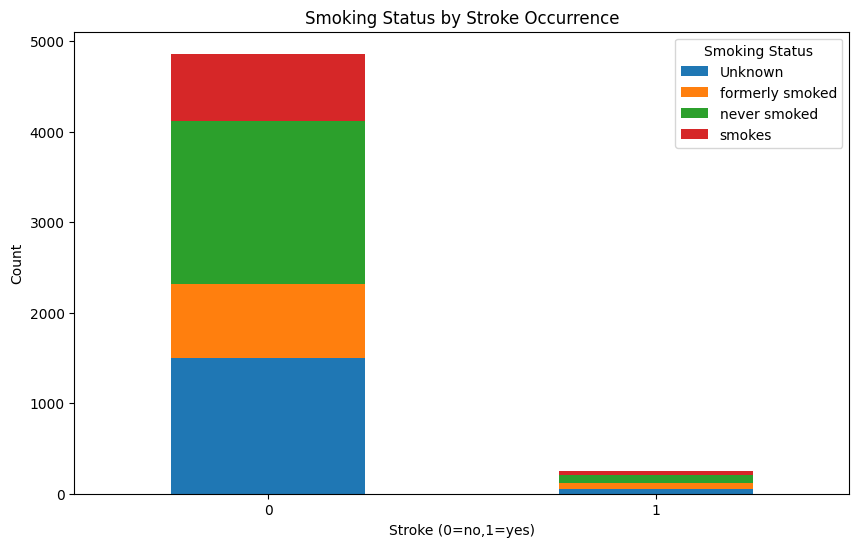

In [25]:
stroke_smoking = df.groupby(['stroke', 'smoking_status']).size().unstack()

stroke_smoking.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Smoking Status by Stroke Occurrence')
plt.xlabel('Stroke (0=no,1=yes)')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.xticks(rotation=0)


plt.show()

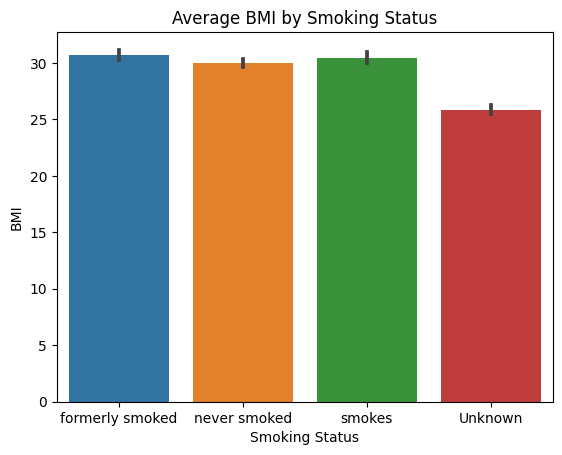

In [26]:
sns.barplot(x='smoking_status',y='bmi',data=df)
plt.title('Average BMI by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.show()

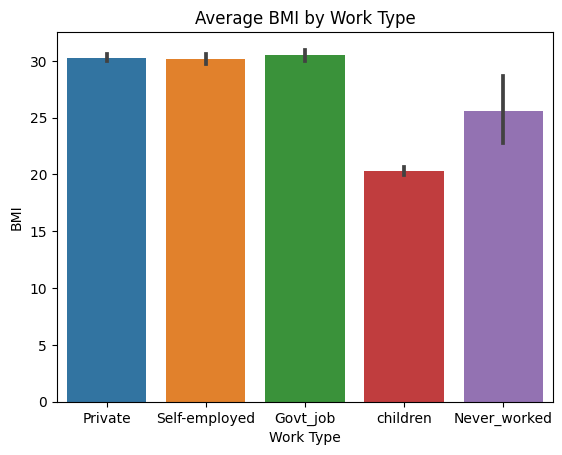

In [27]:
sns.barplot(x='work_type',y='bmi',data=df)
plt.title('Average BMI by Work Type')
plt.xlabel('Work Type')
plt.ylabel('BMI')
plt.show()

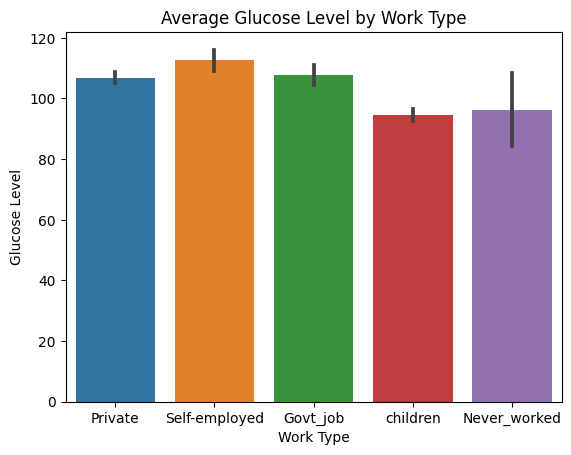

In [28]:
sns.barplot(x='work_type',y='avg_glucose_level',data=df)
plt.title('Average Glucose Level by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Glucose Level')
plt.show()

/tmp/ipykernel_17/54839986.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoking = df.groupby(['age_group', 'work_type']).size().unstack()


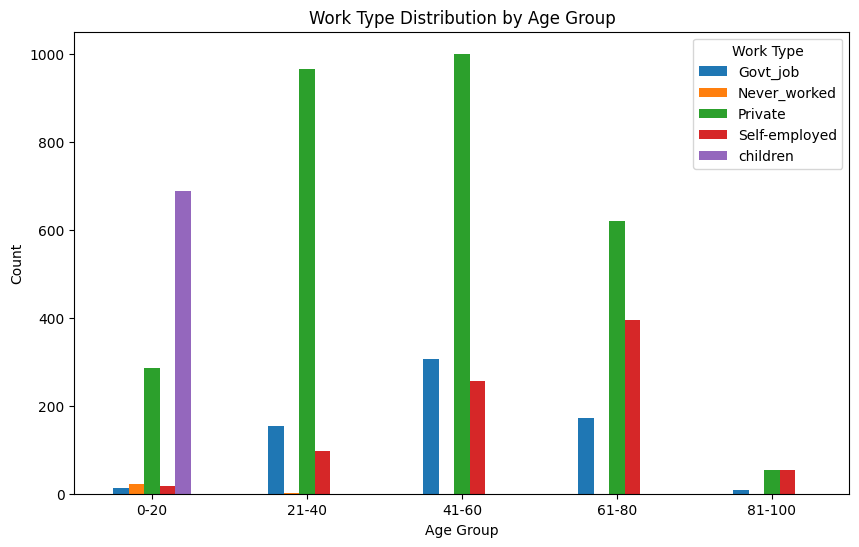

In [29]:
age_bins = [0, 20, 40, 60, 80, 100] 
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

age_smoking = df.groupby(['age_group', 'work_type']).size().unstack()

age_smoking.plot(kind='bar', figsize=(10, 6))

plt.title('Work Type Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Work Type')
plt.xticks(rotation=0)


plt.show()

---

**Part 3F: Line Plots + Scatter Plots**
=

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


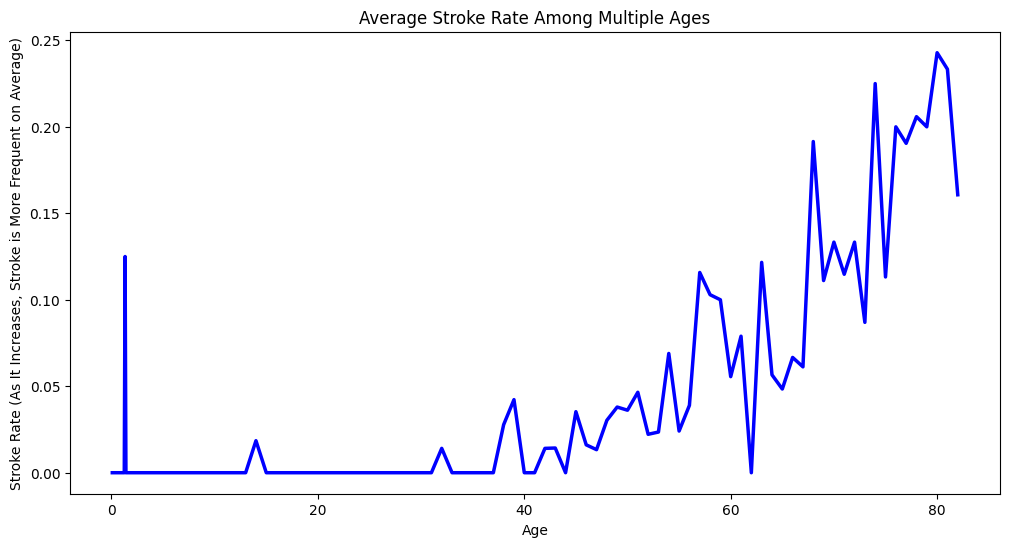

In [30]:

age_stroke_rate = df.groupby('age')['stroke'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "age", y = "stroke",data = age_stroke_rate,color="blue",linewidth = 2.5,dashes = False)
plt.title('Average Stroke Rate Among Multiple Ages')
plt.xlabel('Age')
plt.ylabel('Stroke Rate (As It Increases, Stroke is More Frequent on Average)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


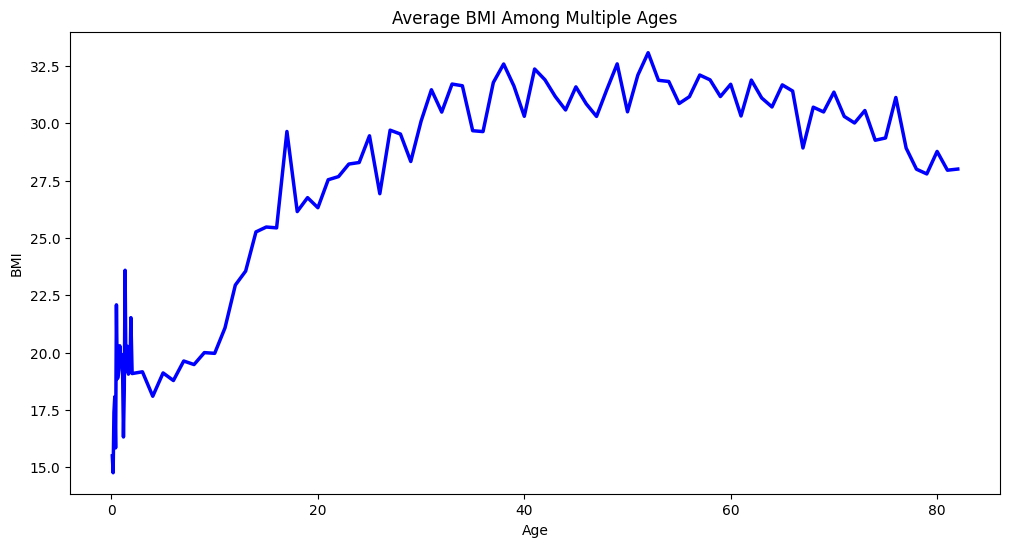

In [31]:
age_bmi_rate = df.groupby('age')['bmi'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "age", y = "bmi",data = age_bmi_rate,color="blue",linewidth = 2.5,dashes = False)
plt.title('Average BMI Among Multiple Ages')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


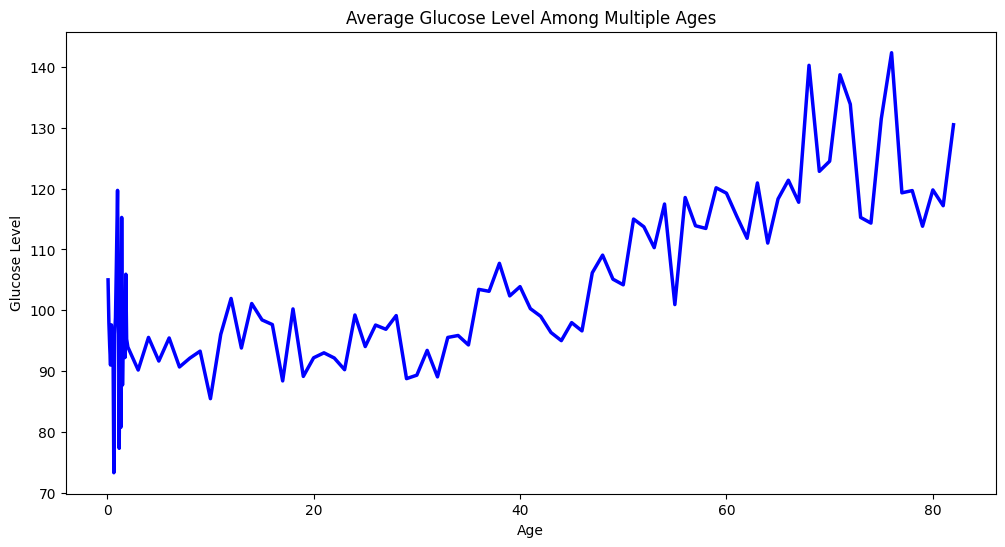

In [32]:
age_gluc_rate = df.groupby('age')['avg_glucose_level'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "age", y = "avg_glucose_level",data = age_gluc_rate,color="blue",linewidth = 2.5,dashes = False)
plt.title('Average Glucose Level Among Multiple Ages')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.show()

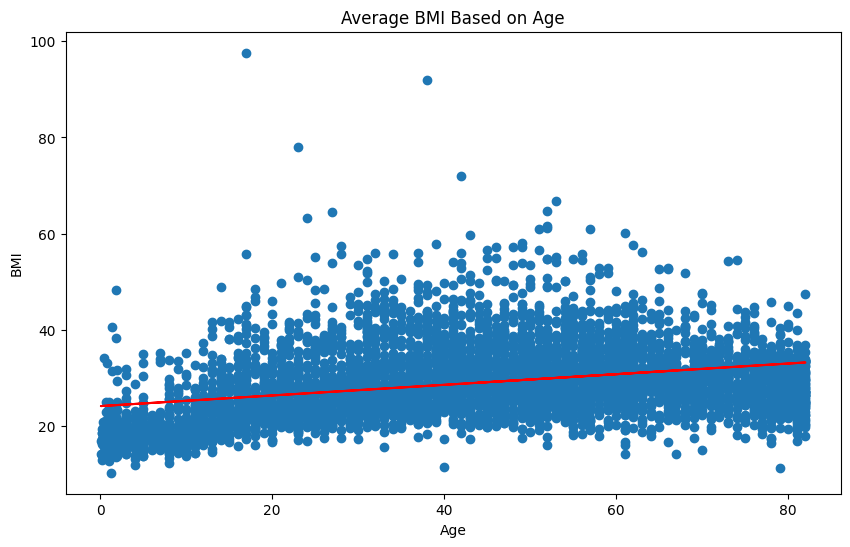

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'],df['bmi'])
plt.title('Average BMI Based on Age')
plt.xlabel('Age')
plt.ylabel('BMI')
z = np.polyfit(df['age'], df['bmi'], 1)
p = np.poly1d(z)

plt.plot(df['age'], p(df['age']), color='red', label="Trend line")
plt.show()



plt.show()

----

**Part 3G: Boxplots**
=

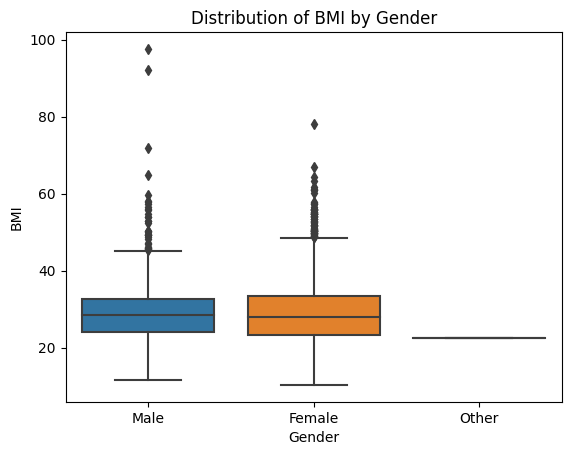

In [34]:
sns.boxplot(x='gender',y='bmi',data=df)
plt.title('Distribution of BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

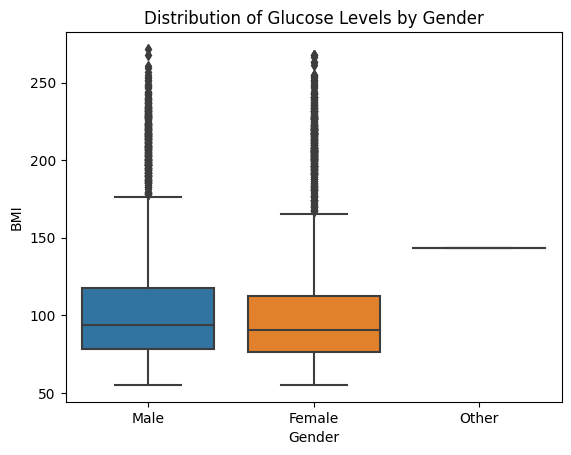

In [35]:
sns.boxplot(x='gender',y='avg_glucose_level',data=df)
plt.title('Distribution of Glucose Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

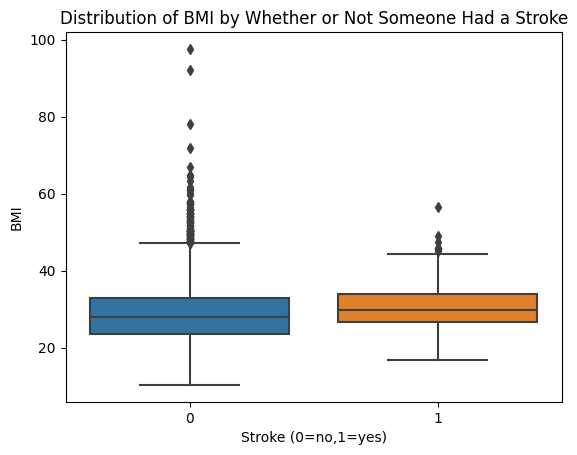

In [36]:
sns.boxplot(x='stroke',y='bmi',data=df)
plt.title('Distribution of BMI by Whether or Not Someone Had a Stroke')
plt.xlabel('Stroke (0=no,1=yes)')
plt.ylabel('BMI')
plt.show()

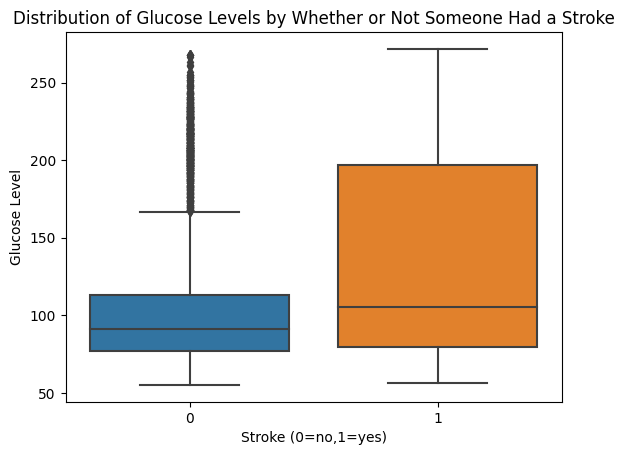

In [37]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=df)
plt.title('Distribution of Glucose Levels by Whether or Not Someone Had a Stroke')
plt.xlabel('Stroke (0=no,1=yes)')
plt.ylabel('Glucose Level')
plt.show()

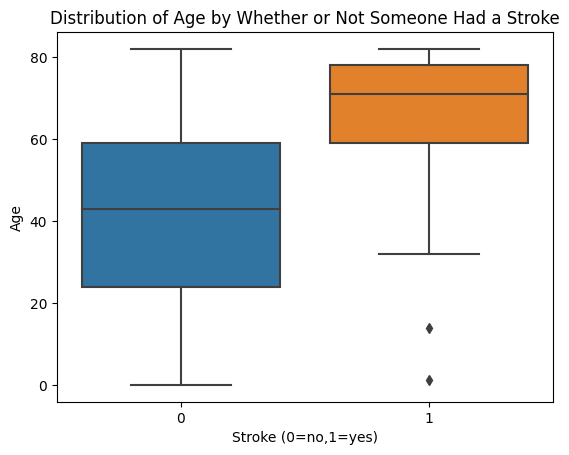

In [38]:
sns.boxplot(x='stroke',y='age',data=df)
plt.title('Distribution of Age by Whether or Not Someone Had a Stroke')
plt.xlabel('Stroke (0=no,1=yes)')
plt.ylabel('Age')
plt.show()

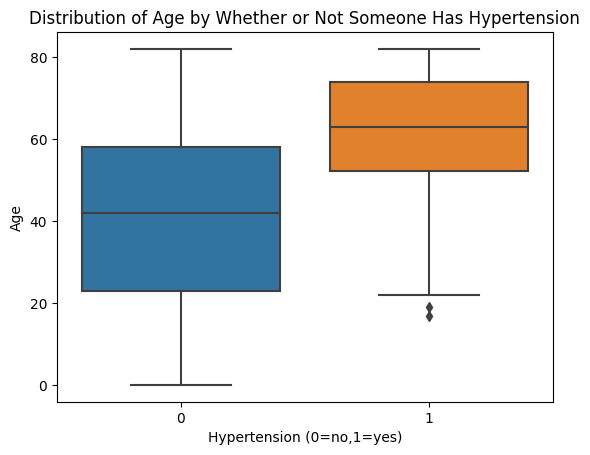

In [39]:
sns.boxplot(x='hypertension',y='age',data=df)
plt.title('Distribution of Age by Whether or Not Someone Has Hypertension')
plt.xlabel('Hypertension (0=no,1=yes)')
plt.ylabel('Age')
plt.show()

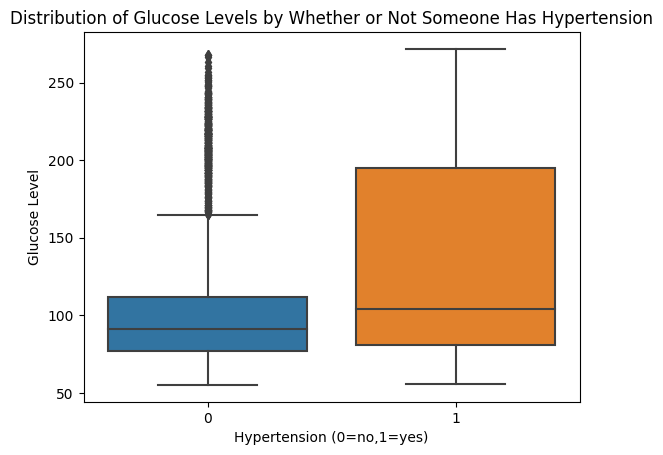

In [40]:
sns.boxplot(x='hypertension',y='avg_glucose_level',data=df)
plt.title('Distribution of Glucose Levels by Whether or Not Someone Has Hypertension')
plt.xlabel('Hypertension (0=no,1=yes)')
plt.ylabel('Glucose Level')
plt.show()

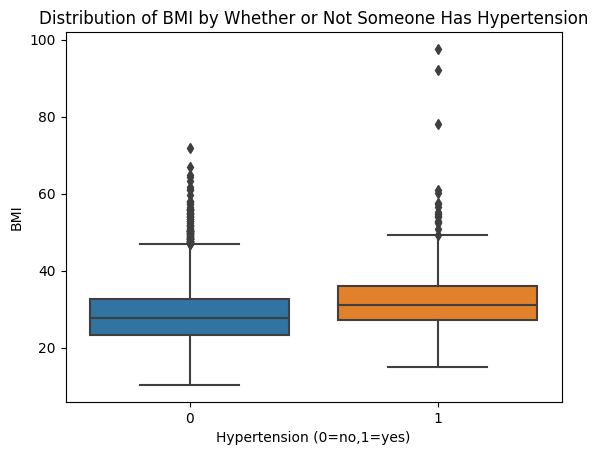

In [41]:
sns.boxplot(x='hypertension',y='bmi',data=df)
plt.title('Distribution of BMI by Whether or Not Someone Has Hypertension')
plt.xlabel('Hypertension (0=no,1=yes)')
plt.ylabel('BMI')
plt.show()

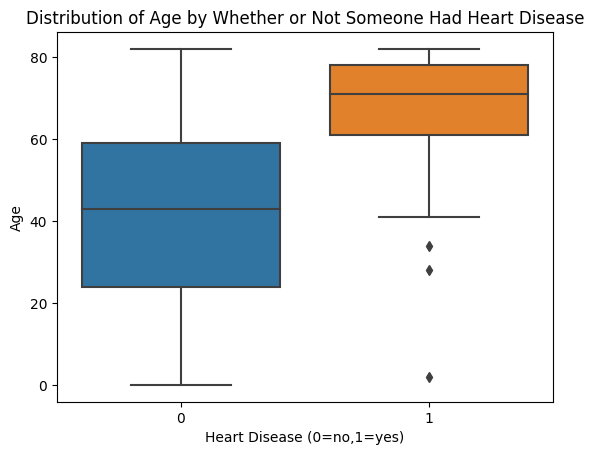

In [42]:
sns.boxplot(x='heart_disease',y='age',data=df)
plt.title('Distribution of Age by Whether or Not Someone Had Heart Disease')
plt.xlabel('Heart Disease (0=no,1=yes)')
plt.ylabel('Age')
plt.show()

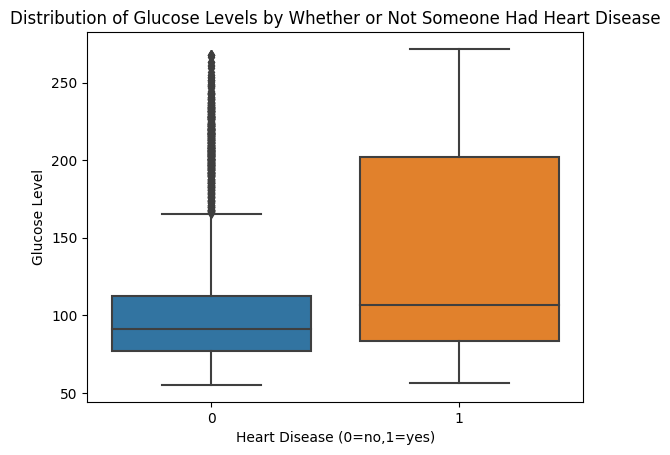

In [43]:
sns.boxplot(x='heart_disease',y='avg_glucose_level',data=df)
plt.title('Distribution of Glucose Levels by Whether or Not Someone Had Heart Disease')
plt.xlabel('Heart Disease (0=no,1=yes)')
plt.ylabel('Glucose Level')
plt.show()

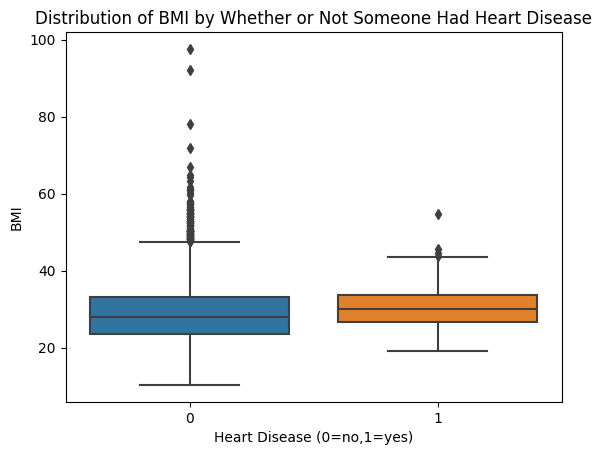

In [44]:
sns.boxplot(x='heart_disease',y='bmi',data=df)
plt.title('Distribution of BMI by Whether or Not Someone Had Heart Disease')
plt.xlabel('Heart Disease (0=no,1=yes)')
plt.ylabel('BMI')
plt.show()

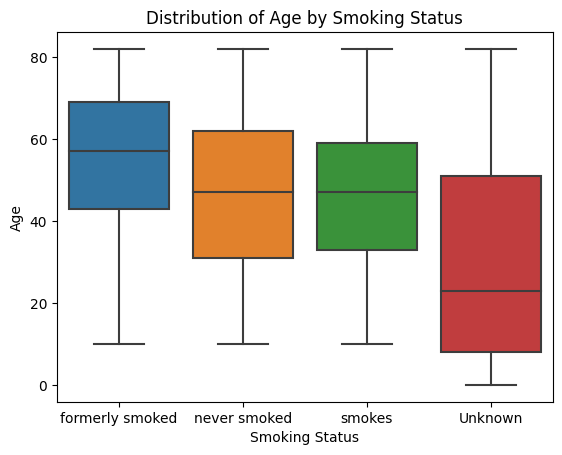

In [45]:
sns.boxplot(x='smoking_status', y='age', data=df)
plt.title('Distribution of Age by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.show()

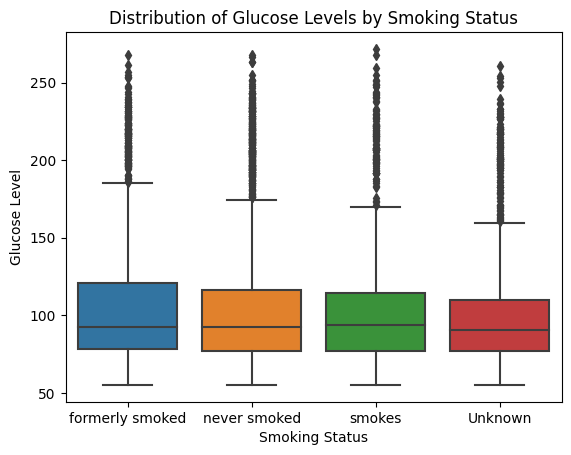

In [46]:
sns.boxplot(x='smoking_status',y='avg_glucose_level',data=df)
plt.title('Distribution of Glucose Levels by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Glucose Level')
plt.show()

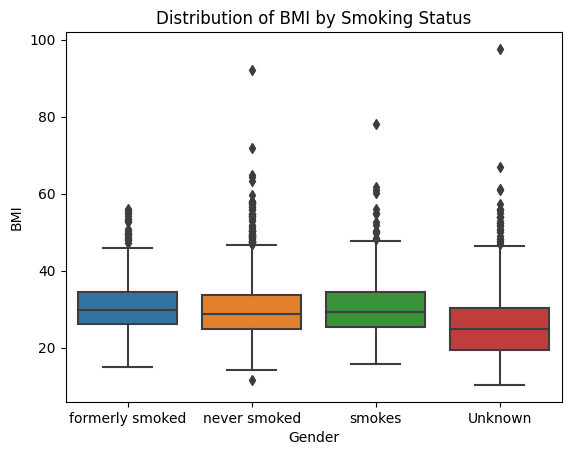

In [47]:
sns.boxplot(x='smoking_status',y='bmi',data=df)
plt.title('Distribution of BMI by Smoking Status')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

-----

**Part 4: Making a ML model to predict whether a person had a stroke or not**
=

In [48]:
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

In [49]:
catcols = [cname for cname in X.columns if X[cname].dtype == "object"]  # Text columns
numcols = [cname for cname in X.columns if X[cname].dtype in ["int64", "float64"]]  # Number columns

In [50]:
numerical_transformer = SimpleImputer(strategy="mean")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing text with most common value
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # Convert data (text) into numbers
])

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numcols),  # Apply numerical transformation
        ("cat", categorical_transformer, catcols)  # Apply categorical transformation
    ]
)

In [52]:
model = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

In [53]:
X_train, X_two, y_train, y_two = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
pipeline.fit(X_train, y_train)

ypred = pipeline.predict(X_two)

In [55]:
print("Accuracy Score:", accuracy_score(y_two, ypred))

Accuracy Score: 0.9383561643835616


Seems to be a great model based on the accuracy score of almost 94%.

In [56]:
print("Classification Report:\n", classification_report(y_two, ypred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



___

**Part 5: Conclusion**
=

# Thank you for viewing my findings. Data analysis is an ongoing process, so there are always so much insights to take out of data. So, I am welcome to any recommendations of measures to analyze from this data set.

# Additonally, I will post important findings from my current analysis a bit later. Until then, I wish you a good journey on your data science projects👋.